# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [3]:

# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline


#### Dataset que se va a utilizar para el entrenamiento

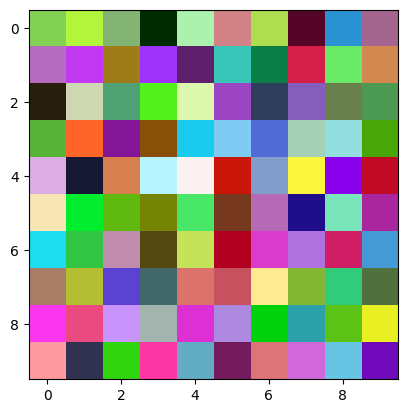

In [20]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
datos = np.random.randint(0, 256, (3, 100))
#Vamos a monstrar los datos, primero creamos una matriz 10x10 con la traspuesta de datos, matplotlib usa enteros sin signo de 8 bits por lo que
#usaremos uint8.
matriz_colores = datos.T.reshape(10,10,3).astype(np.uint8)
#Ahora mostramos la matriz
plt.imshow(matriz_colores)
plt.show()

## SOM Setup
#### Variables definidas por el alumno

In [28]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 10
periodo = 100
learning_rate = 0.05
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [29]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = datos.shape[0]
num_datos = datos.shape[1]

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = int(lado_mapa/2)

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
#En el caso de los colores, cada canal de color (rojo, verde, azul) puede tener valores entre 0 y 255. Si no normalizamos los datos, el
#valor de cada canal de color dominará el resultado del algoritmo de aprendizaje sin importar el valor relativo de los otros canales.
if normalizar_datos:
    datos = datos / 255
else:
    datos = datos

# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
#matriz_pesos = np.random.random((dimensiones de la matriz de pesos))

#### Funciones para entrenar/clasificar

In [30]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
    #Distancia minima y la neurona ganadora, para ello inicializamos la distancia minima a infinito y la neurona ganadora a None ya que se espera que la distancia
    # entre entrada y pesos se vaya reduciendo de forma progresiva.

    dist_minima = np.inf
    bmu = None

    #Recorre todas las neuronas de la matriz de pesos:
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            #Calcula la distancia euclidea entre el patrón de entrada y la neurona actual:
            distancia = np.linalg.norm(patron_entrada - m_pesos[i][j])

            #Si la distancia es menor que la distancia minima, actualiza la distancia minima y la neurona ganadora:
            #actuliaza la distancia minima y la neurona ganadora:
            if distancia < dist_minima:
                dist_minima = distancia
                bmu = m_pesos[i][j]
                bmu_idx = np.array([i, j])
    return bmu, bmu_idx

In [ ]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):

In [ ]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):

In [ ]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

In [ ]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % periodo)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

In [ ]:
# Entrena la red con el dataset de entrenamiento



## SOM Clasificación

In [ ]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [ ]:
# Clasifica nuevos patrones

